In [1]:
from sklearn.model_selection import train_test_split  # Importa a função para dividir os dados em conjuntos de treino e teste.
import numpy as np  # Importa o NumPy, uma biblioteca fundamental para trabalhar com arrays e operações matemáticas em Python.
from sklearn.tree import DecisionTreeClassifier  # Importa o classificador de árvore de decisão do Scikit-learn.
import pandas as pd  # Importa o pandas, uma biblioteca para manipulação e análise de dados, especialmente DataFrames.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Importa várias métricas para avaliar o desempenho do modelo.
import matplotlib.pyplot as plt  # Importa o Matplotlib para visualização de dados.
import seaborn as sns  # Importa o Seaborn, que é uma biblioteca para visualizações estatísticas, complementando o Matplotlib.
from sklearn import tree  # Importa o módulo de árvores do Scikit-learn, usado para visualização e manipulação de árvores de decisão.


In [2]:
# Criando um DataFrame com pandas, contendo informações sobre montagem, velocidade, retrabalho e classificação.
data = pd.DataFrame({
    'montagem': [10, 5, 10, 5, 0, 0],  # Representa a quantidade ou qualidade da montagem realizada, com valores variando de 0 a 10.
    'velocidade': [5, 0, 10, 10, 0, 5],  # Indica a velocidade do processo, com valores que podem refletir o desempenho em uma escala de 0 a 10.
    'retrabalho': [0, 10, 0, 0, 10, 10],  # Número de retrabalhos necessários, onde valores mais altos indicam mais retrabalho e possíveis problemas de qualidade.
    'classif': ['Alta Qualidade', 'Baixa Qualidade', 'Alta Qualidade', 'Alta Qualidade', 'Baixa Qualidade', 'Baixa Qualidade']  # Classificação de cada entrada como 'Alta Qualidade' ou 'Baixa Qualidade', refletindo a avaliação final do processo.
})


Acurácia: 1.0
Precisão: 1.0


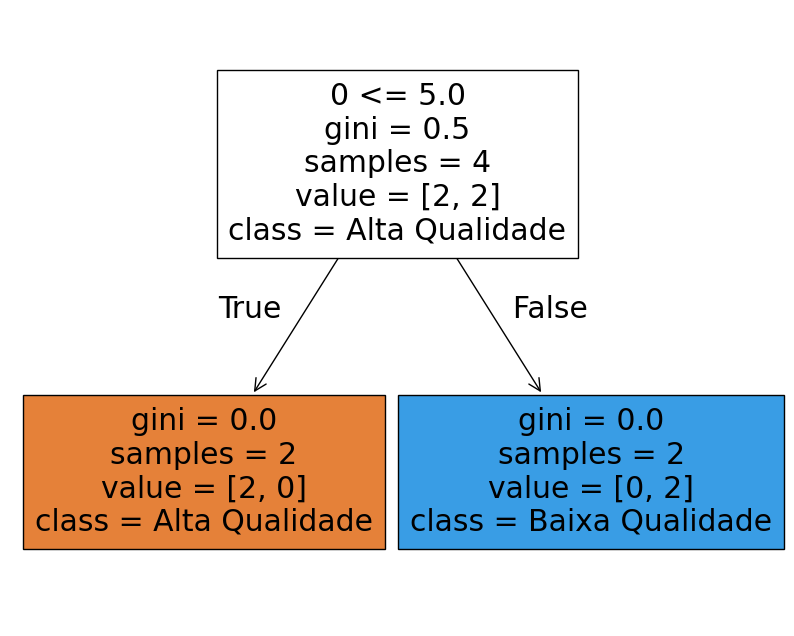

In [4]:
x = np.array(data['retrabalho'])  
y = np.array(data['classif'])  # Extrai a coluna 'classif' do DataFrame e a converte em um array NumPy.

# Divide os dados em conjuntos de treino e teste, usando 20% dos dados para teste.
x_treino, x_teste, y_treino, y_teste = train_test_split(x.reshape(-1, 1), y.reshape(-1, 1), test_size=0.2, random_state=42)

model = DecisionTreeClassifier()  # Cria um modelo de classificador de árvore de decisão.
model.fit(x_treino, y_treino)  # Treina o modelo usando os dados de treino.

prev = model.predict(x_teste)  # Faz previsões sobre o conjunto de teste.
accuracy = accuracy_score(y_teste, prev)  # Calcula a acurácia das previsões.
precisao = precision_score(y_teste, prev, pos_label='Alta Qualidade')  

matrix = confusion_matrix(y_teste, prev)  # Gera a matriz de confusão para as previsões.

# Exibe os resultados de acurácia e precisão.
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precisao}')

# Cria uma visualização da árvore de decisão treinada.
fig = plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=x.tolist(), class_names=y.tolist(), filled=True)
plt.show()  # Mostra o gráfico da árvore de decisão.

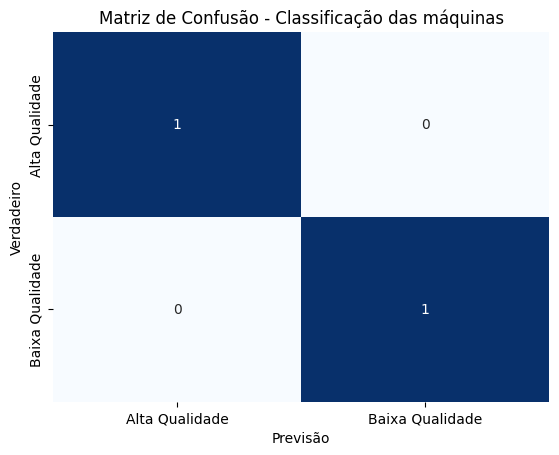

In [7]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Alta Qualidade', 'Baixa Qualidade',],yticklabels=['Alta Qualidade', 'Baixa Qualidade',])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()